In [1]:
# Name: Lilli Nappi
# CWID: 20006502
# DiabetesRF

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

In [4]:
# Loading dataset
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# df.head()
# print(df.describe())
# #data preprocessing
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [5]:
# Find column with at least one NaN
missing_values = df.isnull().any()
print(missing_values)

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool


In [6]:
# Create a new column for BMI

# 0 = Underweight (below 18)
# 1 = Healthy (19-24)
# 2 = Overweight (25-29)
# 3 = Obese (30-39)
# 4 = Extremely Obese (40+)

def categorize_bmi(bmi):
    if bmi < 18:
        return 0
    elif 18 <= bmi <= 24:
        return 1
    elif 25 <= bmi <= 29:
        return 2
    elif 30 <= bmi <= 39:
        return 3
    else:
        return 4

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)
df['BMI_Category'] = df['BMI_Category'].astype(float)
print(df[['BMI', 'BMI_Category']].head())


    BMI  BMI_Category
0  26.0           2.0
1  26.0           2.0
2  26.0           2.0
3  28.0           2.0
4  29.0           2.0


In [7]:
# Replace the BMI column with BMI_Category
df['BMI'] = df['BMI_Category']

df.drop(columns=['BMI_Category'], inplace=True)
print(df.head())


   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  2.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  2.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  2.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  2.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  2.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6

In [8]:
df['Diabetes_binary'] = df['Diabetes_binary'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  object 
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [9]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                70692 non-null  float64
 1   HighChol              70692 non-null  float64
 2   CholCheck             70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   Stroke                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  AnyHealthcare         70692 non-null  float64
 12  NoDocbcCost           70692 non-null  float64
 13  GenHlth               70692 non-null  float64
 14  MentHlth              70692 non-null  float64
 15  PhysHlth           

Diabetes_binary_1.0
False    35346
True     35346
Name: count, dtype: int64


,Diabetes_binary_1.0
0,False
1,False
2,False
3,False
4,False


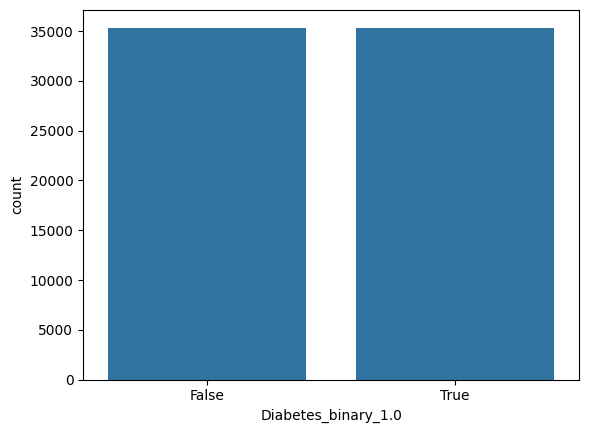

In [32]:
df_obj= pd.get_dummies(df_obj, drop_first=True)

print(df_obj['Diabetes_binary_1.0'].value_counts())
sns.countplot(data=df_obj, x='Diabetes_binary_1.0')
df_obj.head()

In [58]:
from sklearn.preprocessing import StandardScaler

attr = df_num
target = df_obj['Diabetes_binary_1.0']
scaler = StandardScaler()
attr_scaled = scaler.fit_transform(attr)
# Split the data into training and testing sets

attr_train, attr_test, target_train, target_test = train_test_split(attr_scaled, target, test_size=0.3, random_state=42)

In [59]:
#Use the Random Forest methodology to develop a classification model for the Diagnosis
model = RandomForestClassifier(n_estimators = 100, max_depth = 10)

In [60]:
from sklearn.metrics import accuracy_score

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
accuracy_original = accuracy_score(target_test,target_pred )
print(f'Accuracy of model {accuracy_original}%')
print('')

Accuracy of model 0.7526876650320634%



In [61]:
# See which random state is most accurate
import csv

# Prepare a list to store accuracies for each random state
accuracies = []

# Define the range of random states to try
random_states = range(102)

# Track which random state has highest accuracy
best_random_state = None
best_accuracy = 0

# Open a CSV file to save the accuracies
with open('accuracies.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["RandomState", "Accuracy"])

    # Iterate over the random states
    for random_state in random_states:
        # Train-test split (70% training, 30% testing)

        scaler = StandardScaler()
        attr_scaled = scaler.fit_transform(attr)

        attr_train, attr_test, target_train, target_test = train_test_split(attr_scaled, target, test_size=0.3, random_state=random_state)

        # Define model
        model = RandomForestClassifier(n_estimators = 100, max_depth = 10)

        # Train the model
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)
        accuracy = accuracy_score(target_test,target_pred )
        print(f'Accuracy of model {accuracy}%')
        print('')

        # Evaluate performance
        accuracy = accuracy_score(target_test, target_pred)
        print(f"RandomState {random_state}: Accuracy = {accuracy * 100:.2f}%")

        # Save the result to the CSV file
        writer.writerow([random_state, accuracy])

        # Append the accuracy to the list for future analysis (if needed)
        accuracies.append((random_state, accuracy))

        if accuracy > best_accuracy:
            best_random_state = random_state
            best_accuracy = accuracy

print(f"\nBest Random State: {best_random_state} with Accuracy: {best_accuracy * 100:.2f}%")


Accuracy of model 0.7524047529234251%

RandomState 0: Accuracy = 75.24%
Accuracy of model 0.7496699358732554%

RandomState 1: Accuracy = 74.97%
Accuracy of model 0.7527348170501698%

RandomState 2: Accuracy = 75.27%
Accuracy of model 0.75%

RandomState 3: Accuracy = 75.00%
Accuracy of model 0.7479724632214259%

RandomState 4: Accuracy = 74.80%
Accuracy of model 0.7546680497925311%

RandomState 5: Accuracy = 75.47%
Accuracy of model 0.7505186721991701%

RandomState 6: Accuracy = 75.05%
Accuracy of model 0.749622783855149%

RandomState 7: Accuracy = 74.96%
Accuracy of model 0.7526876650320634%

RandomState 8: Accuracy = 75.27%
Accuracy of model 0.7467465107506601%

RandomState 9: Accuracy = 74.67%
Accuracy of model 0.7466993587325538%

RandomState 10: Accuracy = 74.67%
Accuracy of model 0.7490569596378726%

RandomState 11: Accuracy = 74.91%
Accuracy of model 0.753394945303659%

RandomState 12: Accuracy = 75.34%
Accuracy of model 0.7559411542814033%

RandomState 13: Accuracy = 75.59%
Accu

In [75]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
scaler = StandardScaler()
attr_scaled = scaler.fit_transform(attr)
attr_train, attr_test, target_train, target_test = train_test_split(attr_scaled, target, test_size=0.3, random_state=best_random_state)

model = RandomForestClassifier(n_estimators = 100, max_depth = 10)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
accuracy_new = accuracy_score(target_test,target_pred )
print(f'Original Accuracy of model {accuracy_original}%')
print(f'Best Accuracy of model {accuracy_new}%')
print('')

Original Accuracy of model 0.7526876650320634%
Best Accuracy of model 0.7554696341003395%



In [76]:
target_pred = model.predict(attr_test)
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[7548 2978]
 [2208 8474]]
              precision    recall  f1-score   support

       False       0.77      0.72      0.74     10526
        True       0.74      0.79      0.77     10682

    accuracy                           0.76     21208
   macro avg       0.76      0.76      0.76     21208
weighted avg       0.76      0.76      0.76     21208



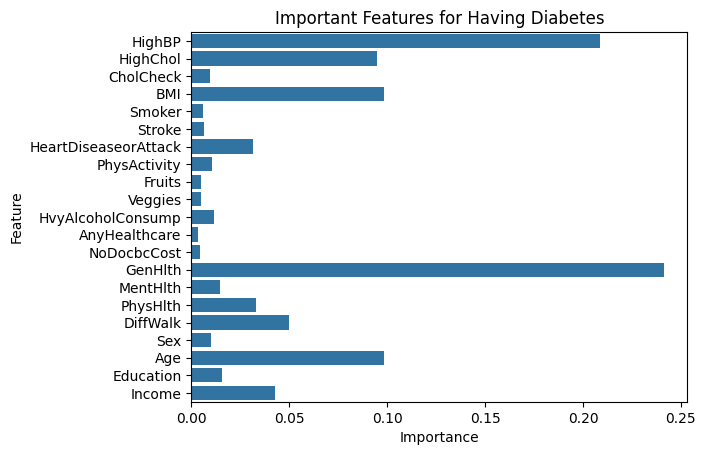

In [77]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': attr.columns, 'Importance': model.feature_importances_})

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Important Features for Having Diabetes')
plt.show()

In [78]:
# Display feature importances
feature_scores = pd.Series(model.feature_importances_, index=attr.columns).sort_values(ascending=False)
print("Having Diabetes")
print(feature_scores)
print("")

Having Diabetes
GenHlth                 0.241256
HighBP                  0.208590
Age                     0.098571
BMI                     0.098300
HighChol                0.094536
DiffWalk                0.049628
Income                  0.042553
PhysHlth                0.033233
HeartDiseaseorAttack    0.031261
Education               0.015684
MentHlth                0.014752
HvyAlcoholConsump       0.011418
PhysActivity            0.010743
Sex                     0.009941
CholCheck               0.009584
Stroke                  0.006435
Smoker                  0.005788
Fruits                  0.005034
Veggies                 0.004805
NoDocbcCost             0.004290
AnyHealthcare           0.003597
dtype: float64

